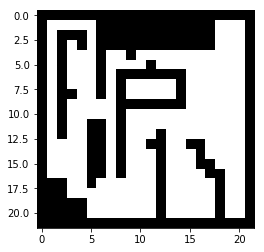

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the world
rawworld = np.genfromtxt('world.csv', delimiter=',')

# Transfer world into a new array with walls all around to avoid edge cases
world = np.ones((np.size(rawworld,1)+2,np.size(rawworld,1)+2))
world[1:-1,1:-1] = rawworld

plt.imshow(world, cmap='binary')

In [14]:
# Starting and finishing points
start = [1,1]
finish = [20,20]

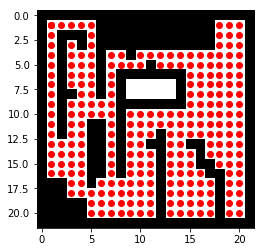

In [15]:
# queue contains open nodes
queue = [[start,start]]

# closed contains closed nodes
closed = []

plt.imshow(world, cmap='binary')

# Iterate while queue has items in it
while queue:
    
    # Pull the node off the queue
    node = queue.pop(0)

    # Add the current node to closed, preventing it from being opened later
    closed.append(node)
    
    plt.plot(node[0][1],node[0][0], marker='o', color='red')

    # Check if an unknown cell has been reached
    if node[0] == finish:
            queue = []

    # Open children in a 4-connected region
    # Only opens if it is not already in the queue, has not been closed, and is not a wall
    for x in [-1,1]:
        if not any([i for i in range(len(queue)) if queue[i][0] == [node[0][0]+x,node[0][1]]]) and not any([i for i in range(len(closed)) if closed[i][0] == [node[0][0]+x,node[0][1]]]) and world[node[0][0]+x,node[0][1]] != 1:
            queue.append([[node[0][0]+x,node[0][1]], node[0]])
        if not any([i for i in range(len(queue)) if queue[i][0] == [node[0][0],node[0][1]+x]]) and not any([i for i in range(len(closed)) if closed[i][0] == [node[0][0],node[0][1]+x]]) and world[node[0][0],node[0][1]+x] != 1:
            queue.append([[node[0][0],node[0][1]+x], node[0]])
            
            
            

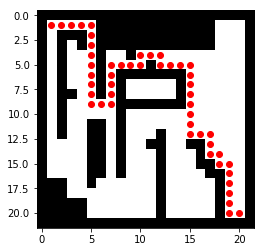

In [16]:
plt.imshow(world, cmap='binary')

# Trace ideal path back to beginning
parent = [finish]
while parent[0] != start:
    plt.plot(parent[0][1],parent[0][0], marker='o', color='red')
    parent = [closed[x][1] for x in range(len(closed)) if closed[x][0] == parent[0]]
    
plt.plot(parent[0][1],parent[0][0], marker='o', color='red')
